In [9]:
cd /content/drive/MyDrive/Colab Notebooks/cours_python/FSCI2610/projet/Finale

/content/drive/MyDrive/Colab Notebooks/cours_python/FSCI2610/projet/Finale


In [17]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

# load data
url = "voice_data.csv"
names = ['class', 'avg_f0', 'avg_F1', 'avg_F2', 'avg_F3', 'avg_F4', 'mean_hnr', 'jitter', 'shimmer', 'disp_form', 'avg_f0_k', 'mean_hnr_k', 'jitter_k', 'shimmer_k', 'disp_form_k', 'avg_f0_s', 'mean_hnr_s', 'jitter_s', 'shimmer_s', 'disp_form_s']
df = pd.read_csv(url, names=names)
#display(df)

X=df.iloc[1:,1:]
#print(X)
Y=df.iloc[1:,0]

# Pre-processing
scaler = MinMaxScaler()
X_sc = scaler.fit_transform(X)

# Feature selection
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X_sc, Y)

# Get the scores for the selected features only
scores_selected_features = fit.scores_[fit.get_support(indices=True)]

# Get the selected features
features = fit.transform(X_sc)

#print(Y)

print("X's shape is (data attributes): ", X.shape)
print("Y's shape (target) is: ",Y.shape)

X's shape is (data attributes):  (108, 19)
Y's shape (target) is:  (108,)


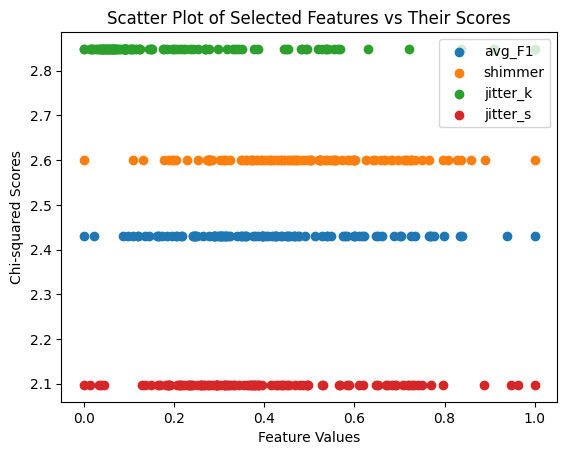

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Get the scores for the selected features only
scores_selected_features = test.scores_[test.get_support(indices=True)]

# Get the selected features
features = test.transform(X_sc)

# Scatter plot
# Instead of plotting individual points, plot each feature against its score
# by repeating the score for each data point in the feature

for i in range(features.shape[1]):  # Iterate over the selected features
    plt.scatter(features[:, i], [scores_selected_features[i]] * features.shape[0],
                label=X.columns[test.get_support(indices=True)][i])

plt.legend()
plt.xlabel("Feature Values")
plt.ylabel("Chi-squared Scores")
plt.title("Scatter Plot of Selected Features vs Their Scores")
plt.show()

In [18]:

#Recursive Feature Elimination (RFE) on the pre-processed data and
#print the selected features, rankings and their name.

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Feature extraction
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(X_sc, Y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

print("Feature names selected (columns): \n", X.columns[1], ",", X.columns[5], ",", X.columns[7], ",", X.columns[16])


Num Features: 4
Selected Features: [False  True False False False  True False  True False False False False
 False False False False  True False False]
Feature Ranking: [ 3  1 11 12  8  1  2  1  9  5 15  6  7 16  4 10  1 14 13]
Feature names selected (columns): 
 avg_F1 , mean_hnr , shimmer , jitter_s


In [13]:
# Determine the R**2 coefficient using an Edge Regression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for Group target vaatiable.
le = LabelEncoder()

# Fit the LabelEncoder to your target variable and transform it
Y_encoded = le.fit_transform(Y)

ridge = Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, random_state=None, solver='auto', tol=0.001)

ridge.fit(X_sc,Y_encoded) # Use the encoded target variable here

ridge.score(X_sc,y=Y_encoded)

0.46163794811004066

In [14]:

from sklearn.linear_model import Ridge
#pretty-printing the coefficients for the attributes.
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

print ("Ridge model:", pretty_print_coefs(ridge.coef_))


Ridge model: -1.094 * X0 + 1.148 * X1 + -0.015 * X2 + -0.333 * X3 + 0.577 * X4 + -0.791 * X5 + -0.629 * X6 + -1.265 * X7 + -0.368 * X8 + 0.342 * X9 + 0.002 * X10 + 0.365 * X11 + -0.723 * X12 + -0.071 * X13 + 0.37 * X14 + -0.12 * X15 + 0.859 * X16 + 0.167 * X17 + 0.116 * X18


In [15]:
#optionnelle

def drop_outliers_IQR(df):
   """
   Drops outliers from a DataFrame using the IQR method.

   Returns:
       pandas.DataFrame: The DataFrame with outliers removed.
   """

   # Convert columns to numeric if possible
   for col in df.columns:
       try:
           df[col] = pd.to_numeric(df[col])
       except ValueError:
           pass  # Ignore columns that cannot be converted

   q1 = df.quantile(0.25, numeric_only=True)  # Use numeric_only=True
   q3 = df.quantile(0.75, numeric_only=True)  # Use numeric_only=True
   IQR = q3 - q1

   not_outliers = df[~((df < (q1 - 1.5 * IQR))).any(axis=1)]

   outliers_dropped = not_outliers.dropna().reset_index()  # Return not_outliers

   return outliers_dropped

df1= df.iloc[1:,1:]
df_outliers_dropped = drop_outliers_IQR(df1)
df_outliers_dropped


,index,avg_f0,avg_F1,avg_F2,avg_F3,avg_F4,mean_hnr,jitter,shimmer,disp_form,avg_f0_k,mean_hnr_k,jitter_k,shimmer_k,disp_form_k,avg_f0_s,mean_hnr_s,jitter_s,shimmer_s,disp_form_s
0,1,304.75,778.00,2245.60,3571.05,5081.95,10.75,1.958567,1.377360,1434.650000,4.120596,6.512729,4.430703,2.066858,5.193159,1.026296,1.519206,1.205160,-0.259522,0.069057
1,2,294.45,662.70,1939.90,3251.25,4775.30,12.25,1.663247,1.389308,1370.866667,2.278845,3.440682,3.091686,3.108758,2.927942,0.133170,0.667077,0.560049,-0.244830,-0.390032
2,3,255.85,884.55,2183.50,3513.75,5111.40,12.90,1.422039,1.185426,1408.950000,1.737850,5.391922,2.999970,3.019235,2.481138,0.169958,1.548892,0.722608,-0.348192,0.175821
3,6,274.50,751.80,2276.35,3624.00,5020.65,12.05,1.348860,1.356875,1422.950000,3.840740,2.167156,2.126006,3.074187,2.465019,-0.699683,0.389802,0.466613,-0.184634,0.407536
4,7,303.00,719.90,2028.10,3297.50,4702.75,9.25,2.071485,1.561425,1327.616667,6.952120,2.562961,2.220366,4.002712,3.365109,1.758636,-0.168466,0.374169,-0.868644,0.353161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,103,238.55,1105.40,2402.00,3511.10,4808.95,5.65,1.644070,1.665042,1234.516667,4.461122,4.636875,7.736325,2.372713,3.234770,-0.094724,1.152677,2.087395,0.497442,0.455561
94,104,255.05,858.95,2223.80,3384.55,4787.25,9.75,1.111741,1.302515,1309.433333,5.190369,3.365465,1.875519,3.242620,1.881098,1.338850,0.806779,0.273689,-0.246472,0.152368
95,105,265.00,1022.95,2350.50,3596.25,4973.85,9.80,2.340409,1.299065,1316.966667,3.619754,6.548035,8.302562,2.789693,4.012588,1.028263,1.752227,2.363517,0.612808,0.451664
96,106,266.45,762.45,2278.70,3557.60,4742.95,10.95,1.489093,1.517415,1326.833333,2.151113,2.531716,3.208905,2.385634,3.771958,0.114164,0.130736,0.951328,-0.507807,1.004282
